# Classifier Project

# Intro

Columnas relevantes:

- F1: intercolumnar distance
- F2: upper margin
- F3: lower margin
- F4: exploitation
- F5: row number
- F6: modular ratio
- F7: interlinear spacing
- F8: weight
- F9: peak number
- F10: modular ratio/ interlinear spacing

Author: Marcus, Philippus, Ovionicus, Blanquius, Clarius, Paithonius, Ubuntius, FerrumEffractarius

# Import corresponding libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# Import the data

In [2]:
data = pd.read_csv('../input/training_dataset.csv')  

In [3]:
data.head(2)

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus


In [4]:
'''data = data.rename(columns={
    "0": "intercolumnar distance", 
    "1": "upper margin", 
    "2":"lower margin",
    "3":"exploitation", 
    "4":"row number",
    "5":"modular ratio",
    "6":"interlinear spacing",
    "7":"weight",
    "8":"peak number",
    "9":"modular ratio/interlinear spacing"
})'''

'data = data.rename(columns={\n    "0": "intercolumnar distance", \n    "1": "upper margin", \n    "2":"lower margin",\n    "3":"exploitation", \n    "4":"row number",\n    "5":"modular ratio",\n    "6":"interlinear spacing",\n    "7":"weight",\n    "8":"peak number",\n    "9":"modular ratio/interlinear spacing"\n})'

In [5]:
data.head(2)

,id,0,1,2,3,4,5,6,7,8,9,author
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus


In [6]:
data.isnull().sum()

id        0
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
author    0
dtype: int64

In [7]:
data.dtypes

id          int64
0         float64
1         float64
2         float64
3         float64
4         float64
5         float64
6         float64
7         float64
8         float64
9         float64
author     object
dtype: object

In [8]:
data['author'].unique()

array(['Ubuntius', 'Philippus', 'Marcus', 'Clarius', 'Blanquius',
       'FerrumEffractarius', 'Paithonius', 'Ovionicus'], dtype=object)

In [9]:
# separamos la columna que queremos predecir del resto de datos
X = data.drop(columns=['id','author'])
y = data['author']

# Correlation table (Raw Data)¶

In [10]:
#Pasamos los autores a dummies con el fin de poder verlos en la matrix de correlación y ver con qué tienen más relacion.
data = pd.get_dummies(data)
data.head()

,id,0,1,2,3,4,5,6,7,8,9,author_Blanquius,author_Clarius,author_FerrumEffractarius,author_Marcus,author_Ovionicus,author_Paithonius,author_Philippus,author_Ubuntius
0,0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,0,0,0,0,0,0,0,1
1,1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,0,0,0,0,0,0,1,0
2,2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,0,0,0,1,0,0,0,0
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,0,1,0,0,0,0,0,0
4,4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,0,0,0,0,0,0,1,0


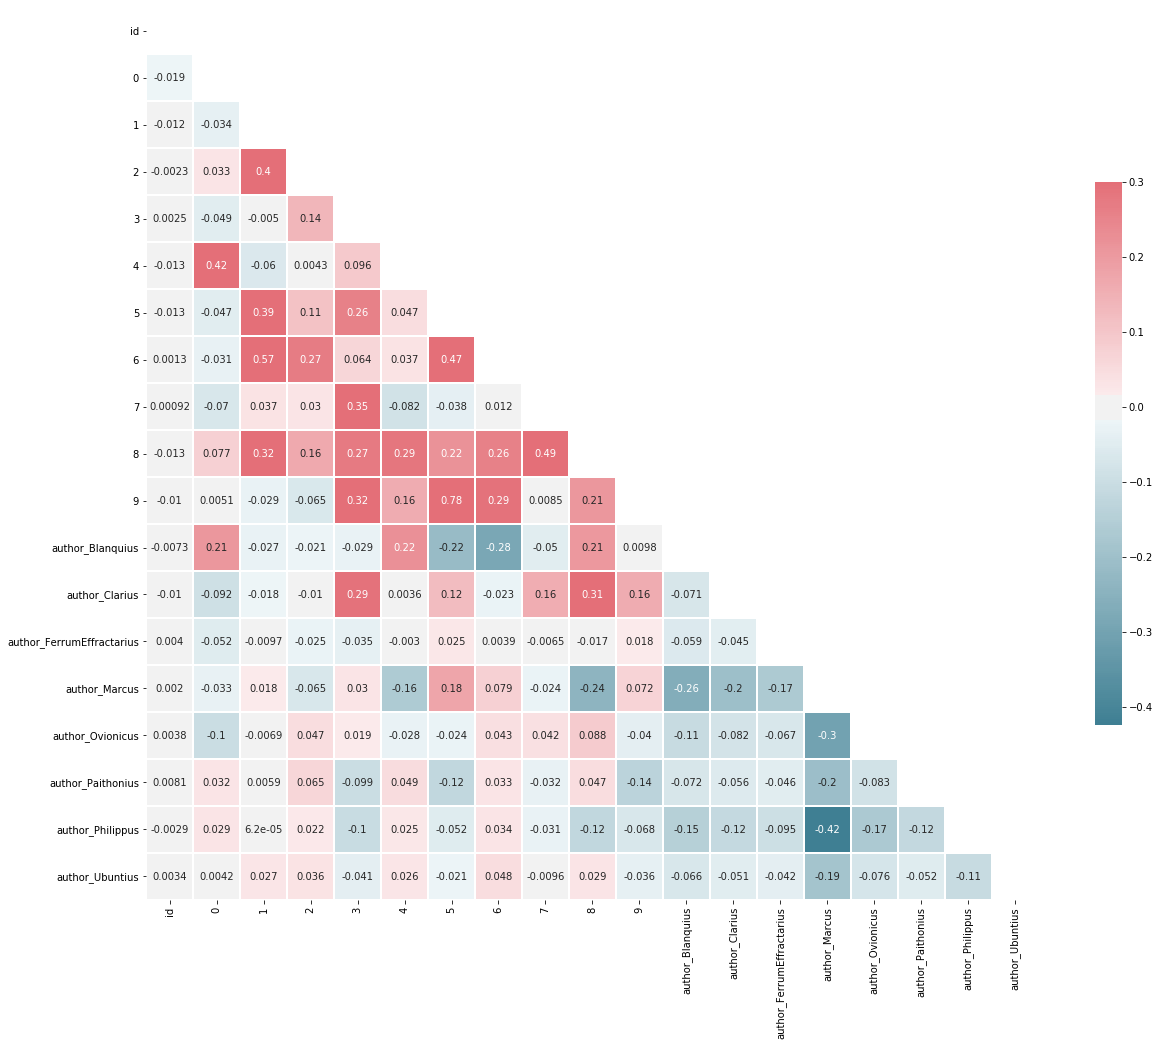

In [11]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

# Modelo

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
models = {
    "svm-linear": CalibratedClassifierCV(LinearSVC(),cv=3),
    "svm-rbf": CalibratedClassifierCV(SVC(kernel="sigmoid",gamma="auto"),cv=2),
    "randomforest": RandomForestClassifier(n_estimators=100),
    "tree":tree.DecisionTreeClassifier(),
    "MLPClassifier": MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    "HistGradient": HistGradientBoostingClassifier(),
}

# Train all the models in the models dict
for name,m  in models.items():
    print(f"Training {name}...")
    m.fit(X_train, y_train)
print("Train complete")

Training svm-linear...


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training svm-rbf...
Training randomforest...
Training tree...
Training MLPClassifier...


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training HistGradient...
Train complete


In [14]:

printMetric = lambda label,value:print(f"\t {label}: {round(value,3)}")

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Evaluating model {name}")
    
    printMetric("Accuracy",accuracy_score(y_test, y_pred))
    
    
print("Train complete")

Evaluating model svm-linear
	 Accuracy: 0.543
Evaluating model svm-rbf
	 Accuracy: 0.498
Evaluating model randomforest
	 Accuracy: 0.981
Evaluating model tree
	 Accuracy: 0.98
Evaluating model MLPClassifier
	 Accuracy: 0.635
Evaluating model HistGradient
	 Accuracy: 0.998
Train complete


In [15]:
m.fit(X, y)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [16]:
print(m.score(X_train, y_train))
print(m.score(X_test, y_test))

1.0
1.0


In [17]:
test_df = pd.read_csv("../input/test_dataset.csv")
test_df.head()

,id,0,1,2,3,4,5,6,7,8,9
0,0,0.019197,0.038511,0.192950,0.323367,0.261718,-0.100360,0.106925,0.463833,0.064084,-0.025146
1,1,0.006853,0.462474,-0.016878,0.649795,-1.347089,-0.307984,-0.119577,0.855597,0.375899,-0.092040
2,2,0.229043,-0.369751,0.484575,0.250174,0.261718,-0.017310,0.446679,0.232984,-0.123005,-0.126856
3,3,-0.104241,-0.055704,0.299642,0.391249,0.172340,0.314889,0.106925,0.220694,0.219991,0.368972
4,4,1.043737,-0.401156,0.473906,0.506215,0.261718,0.065740,-0.195078,0.515440,-0.808997,0.315303


In [18]:
test = test_df.drop(columns=['id'])

In [19]:
y_pred = m.predict(test)

In [20]:
last_file = pd.DataFrame({
    'id' : test_df['id'],
    'author' : y_pred
})

In [21]:
last_file.head()

,id,author
0,0,Philippus
1,1,Philippus
2,2,Marcus
3,3,Marcus
4,4,Marcus


In [22]:
last_file.to_csv('ejemplo2.csv',index = False)